# ResNet50 Standalone Feature Extractor

* Visualize Feature maps

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import expand_dims

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Sequential

import PIL
from PIL import Image

In [34]:
#load model
model = ResNet50()
model = Model(inputs=model.inputs, outputs=model.layers[4].output)
model.summary()

Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 230, 230, 3)       0         
_________________________________________________________________
conv1_conv (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 64)      256       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 64)      0         
Total params: 9,728
Trainable params: 9,600
Non-trainable params: 128
_________________________________________________________________


In [9]:
#load examplary image
#img0= load_img( r'E:\Babette\MasterThesis\example_pics\id_43.jpg')
img0= load_img( r'E:\Babette\MasterThesis\example_pics\id_11130.jpg')
#img1= load_img( r'E:\Babette\MasterThesis\example_pics\id_43.jpg', target_size=(224,224))
img1= load_img( r'E:\Babette\MasterThesis\example_pics\id_11130.jpg', target_size=(224,224))

img= img_to_array(img1)
img= expand_dims(img, axis=0)
img= preprocess_input(img)

In [10]:
plt.rcParams['figure.dpi'] = 50

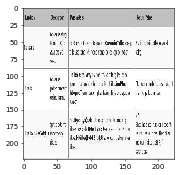

In [11]:
plt.imshow(img1)


In [35]:
#get feature maps for first hidden conv layer
feature_maps= model.predict(img)

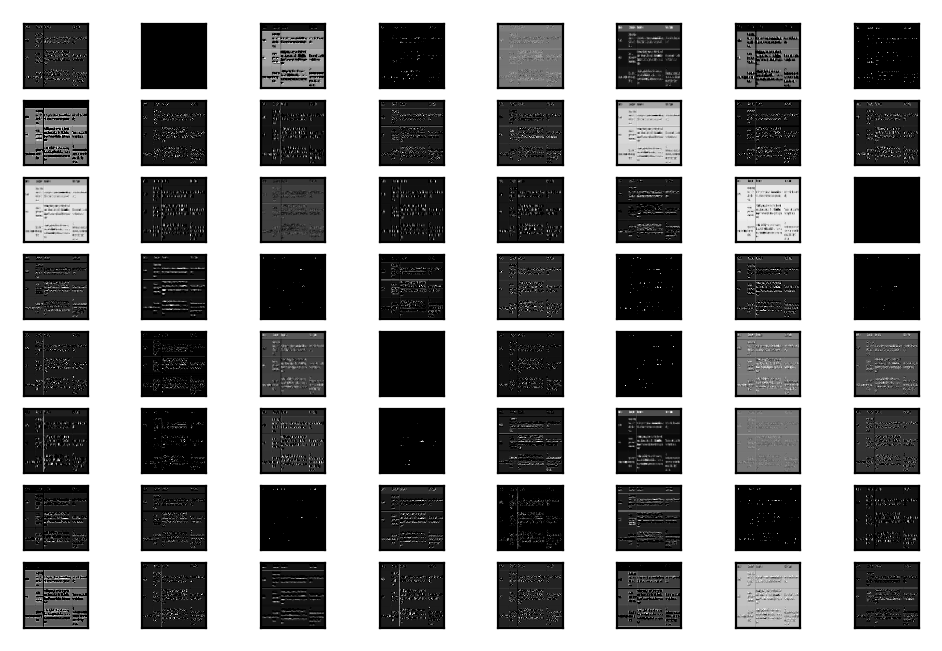

In [36]:
plt.rcParams['figure.dpi'] = 200
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()

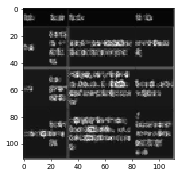

In [56]:
plt.rcParams['figure.dpi'] = 50
N=64
arr = np.zeros((112,112),np.float)

for ix in range(0,64):
    imarr = np.array(feature_maps[0,:,:,ix])
    arr = arr+imarr/N

plt.imshow(arr, cmap='gray')

## Visualize feature maps at last conv layers of all 5 conv blocks

In [38]:
# create model
model5 = ResNet50()
#indeces of output layers
ixs= [4, 38, -97, -35, -3]
outputs = [model5.layers[i].output for i in ixs]
model5 = Model(inputs=model5.inputs, outputs=outputs)


In [39]:
#get feature maps
feature_maps5 = model5.predict(img)

## 1st conv feature map

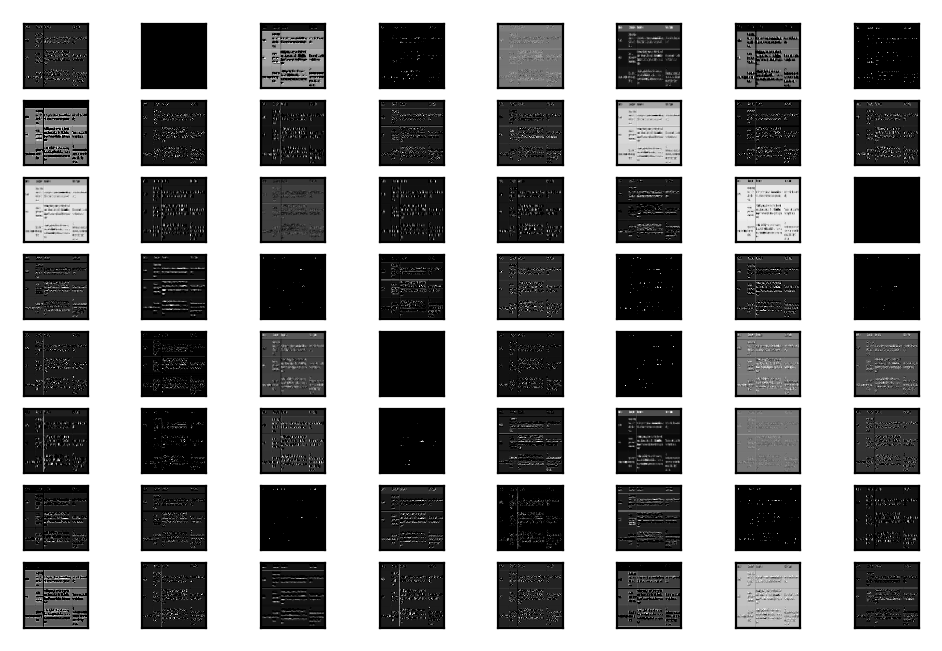

In [40]:
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps5[0][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()
plt.close()

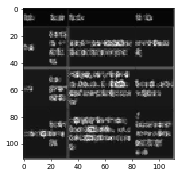

In [45]:
plt.rcParams['figure.dpi'] = 50

N=64
arr = np.zeros((112,112),np.float)
for ix in range(0,64):
    imarr = np.array(feature_maps5[0][0,:,:,ix])
    arr = arr+imarr/N
    
plt.imshow(arr, cmap='gray')

## 2nd conv block feature maps

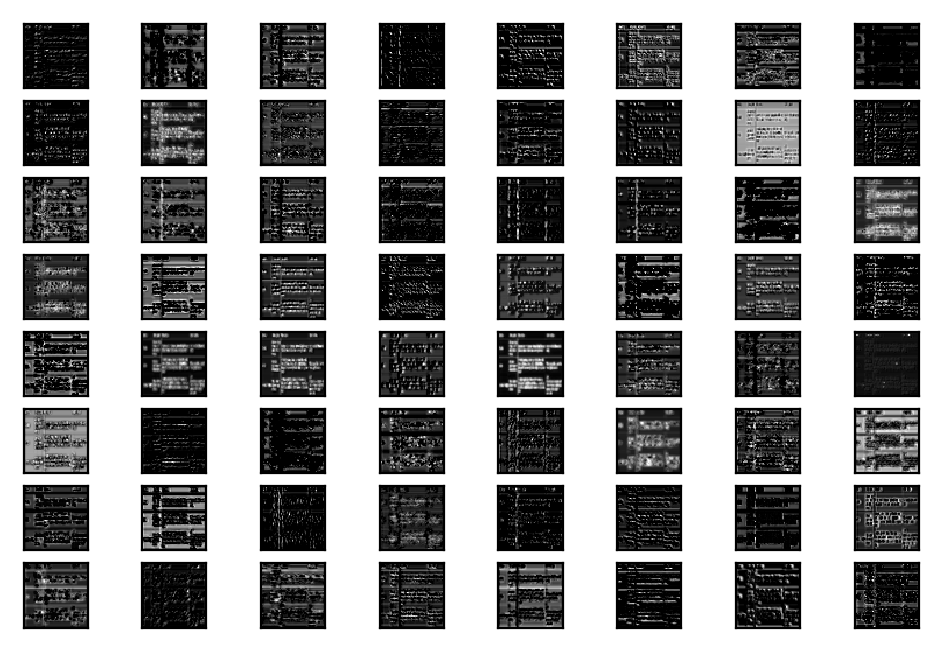

In [50]:
plt.rcParams['figure.dpi'] = 200
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps5[1][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()
plt.close()

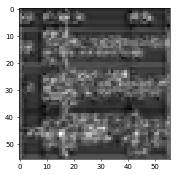

In [48]:
plt.rcParams['figure.dpi'] = 50

N=128
arr = np.zeros((56,56),np.float)
for ix in range(0,63):
    imarr = np.array(feature_maps5[1][0,:,:,ix])
    arr = arr+imarr/N
    
plt.imshow(arr, cmap='gray')

## 3rd conv bloxk feature maps

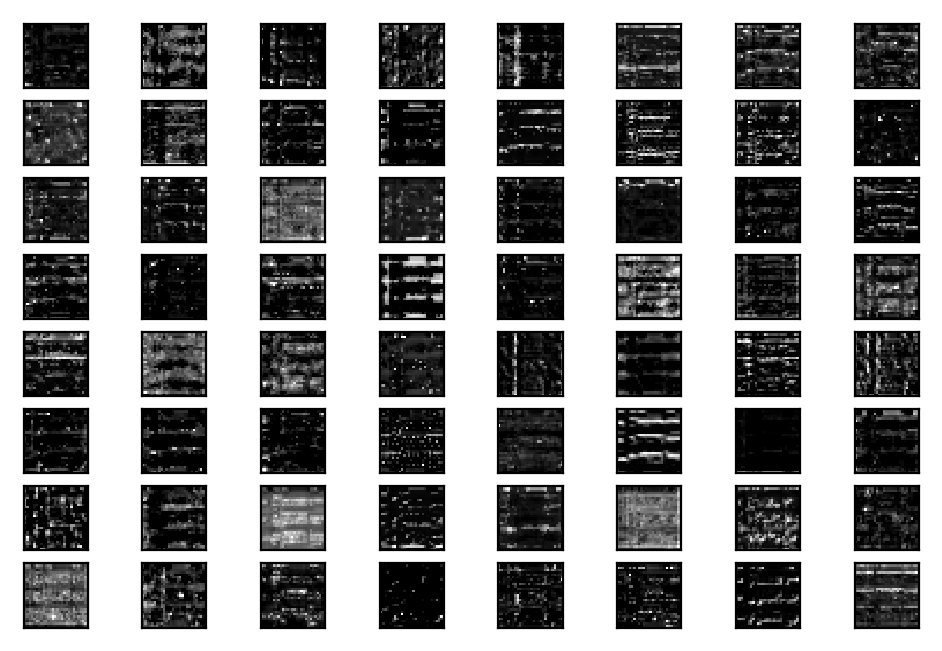

In [51]:
plt.rcParams['figure.dpi'] = 200
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps5[2][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()
plt.close()

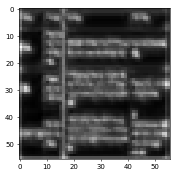

In [312]:
plt.rcParams['figure.dpi'] = 50

N=256
arr = np.zeros((56,56),np.float)
for ix in range(0,63):
    imarr = np.array(feature_maps5[2][0,:,:,ix])
    arr = arr+imarr/N
    
plt.imshow(arr, cmap='gray')

## 4th conv block feature maps

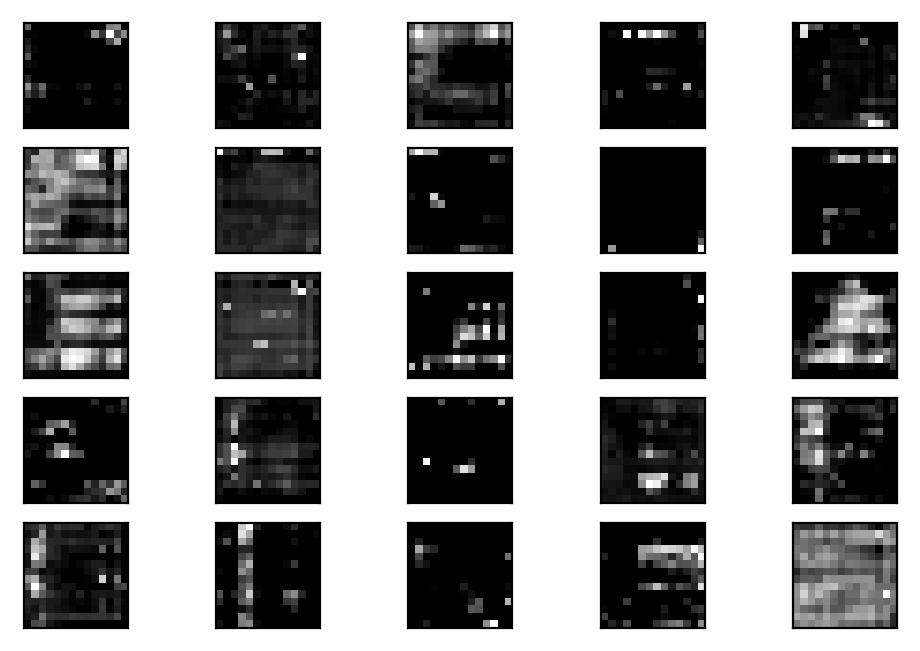

In [52]:
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps5[3][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()
plt.close()

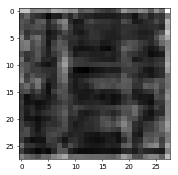

In [313]:
plt.rcParams['figure.dpi'] = 50

N=512
arr = np.zeros((28,28),np.float)
for ix in range(0,63):
    imarr = np.array(feature_maps5[3][0,:,:,ix])
    arr = arr+imarr/N
    
plt.imshow(arr, cmap='gray')

## 5th conv block feature maps

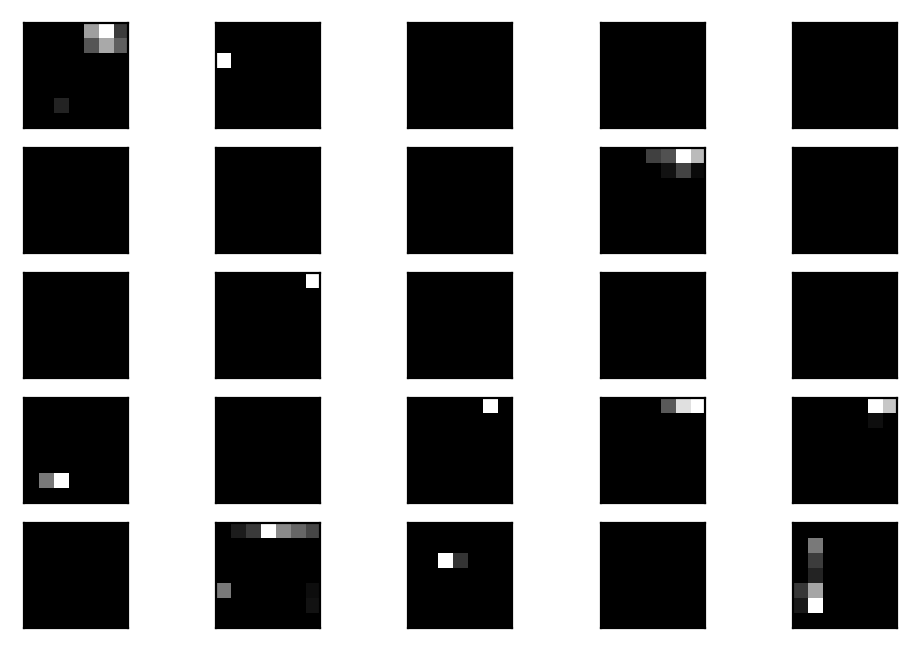

In [53]:
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps5[4][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()

plt.close()

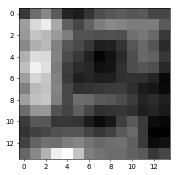

In [317]:
plt.rcParams['figure.dpi'] = 50

N=512
arr = np.zeros((14,14),np.float)
for ix in range(0,63):
    imarr = np.array(feature_maps5[4][0,:,:,ix])
    arr = arr+imarr/N
    
plt.imshow(arr, cmap='gray')

# Vgg16 retrained

In [225]:
#load model
#Define Model
model= Sequential()
model.add(Rescaling(1./255, input_shape=(224, 224, 3)))
vgg16 = VGG16(
    include_top=True,
    weights= "imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    )
for layers in vgg16.layers[1:-1]:
    model.add(layers)
model.add(Dense(1, activation='sigmoid'))
model.load_weights(r'E:\Babette\MasterThesis\Models\VGG16_imgnet_trainable_full\patience50\vgg16_model1_imgnet_weights.h5')
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [232]:
#transform to functional
input_layer = Input(batch_shape=model.layers[0].input_shape)
prev_layer = input_layer
for layer in model.layers:
    layer._inbound_nodes = []
    prev_layer = layer(prev_layer)

funcmodel = Model([input_layer], [prev_layer])


In [234]:
# create model
#indeces of output layers
ixs= [3, 6, 10, 12, 18]
outputs = [funcmodel.layers[i].output for i in ixs]
model = Model(inputs=funcmodel.inputs, outputs=outputs)


In [236]:
#load examplary image
#img0= load_img( r'E:\Babette\MasterThesis\example_pics\id_43.jpg')
img0= load_img( r'E:\Babette\MasterThesis\example_pics\id_11130.jpg')
#img1= load_img( r'E:\Babette\MasterThesis\example_pics\id_43.jpg', target_size=(224,224))
img1= load_img( r'E:\Babette\MasterThesis\example_pics\id_11130.jpg', target_size=(224,224))

img= img_to_array(img1)
img= expand_dims(img, axis=0)
#img= preprocess_input(img)


In [238]:
#get feature maps for first hidden conv layer
f_map= model.predict(img)

## 1st conv feature map

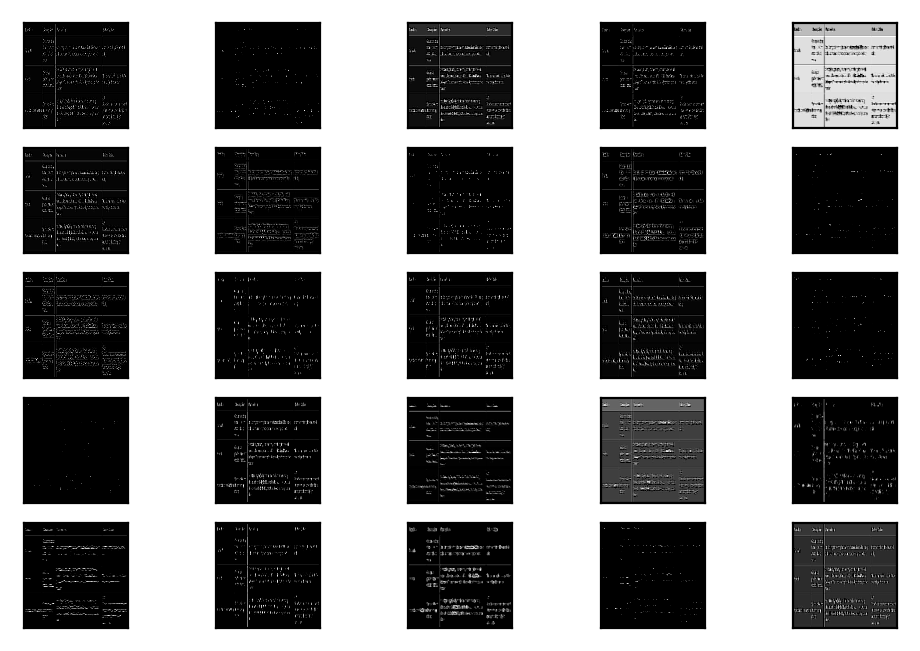

In [242]:
plt.rcParams['figure.dpi'] = 200
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f_map[0][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()

## 2nd conv feature map

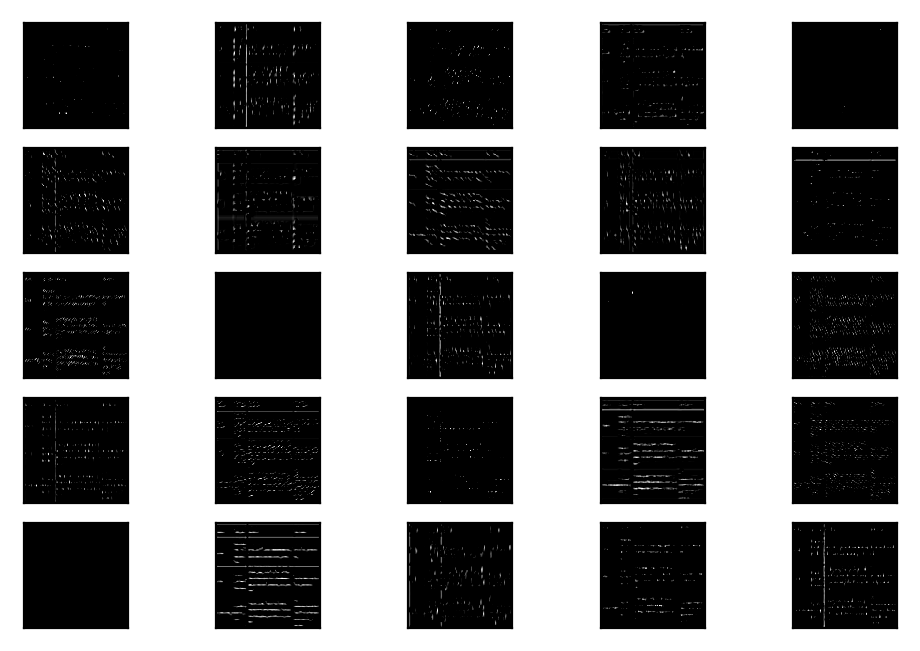

In [251]:
plt.rcParams['figure.dpi'] = 200
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f_map[1][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()

In [252]:
## 3rd cov feature map


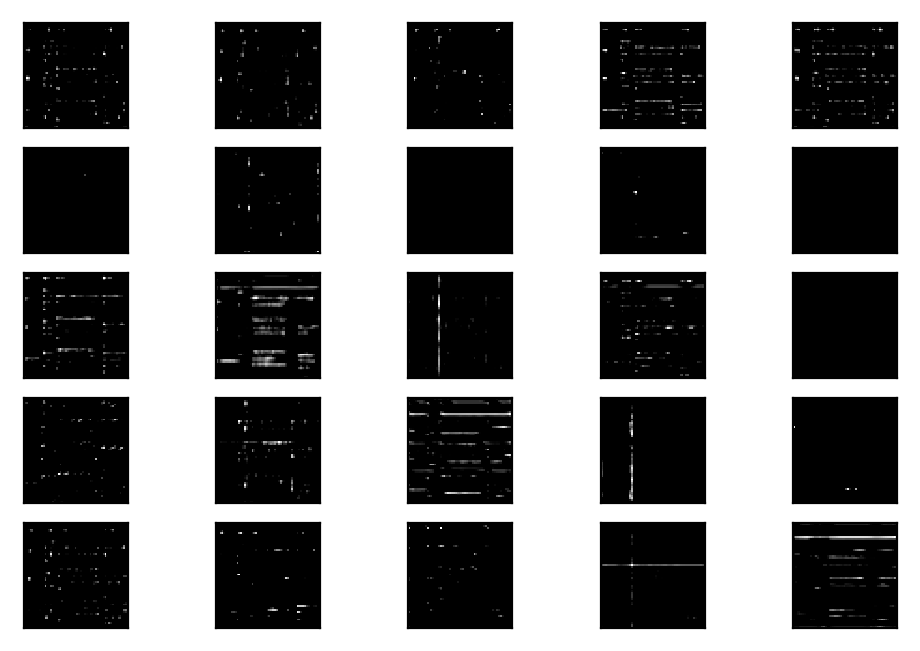

In [253]:
plt.rcParams['figure.dpi'] = 200
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f_map[2][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()

In [254]:
## 4th conv feature map

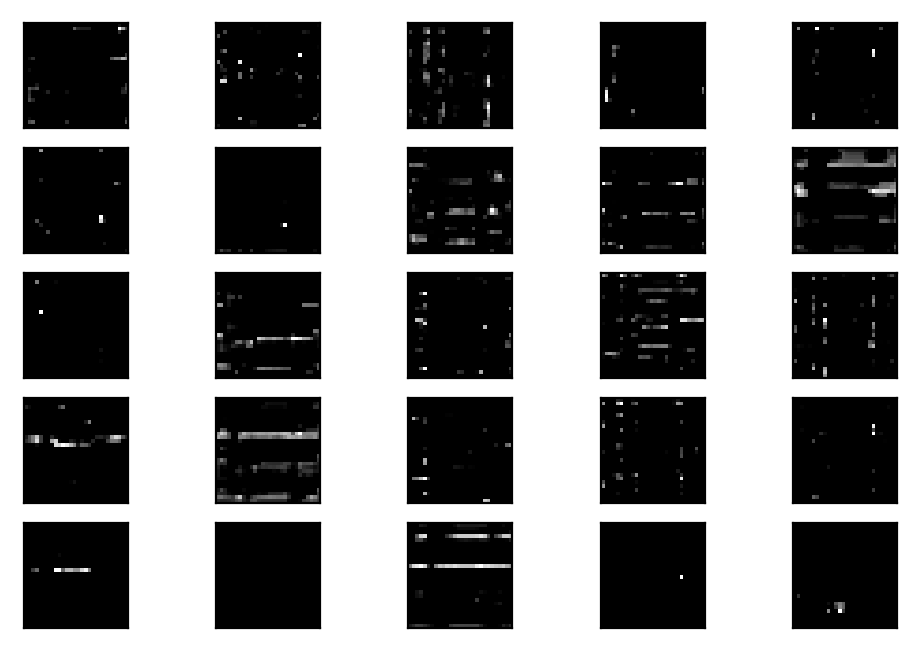

In [255]:
plt.rcParams['figure.dpi'] = 200
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f_map[3][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()

In [256]:
## 5th conv feature map

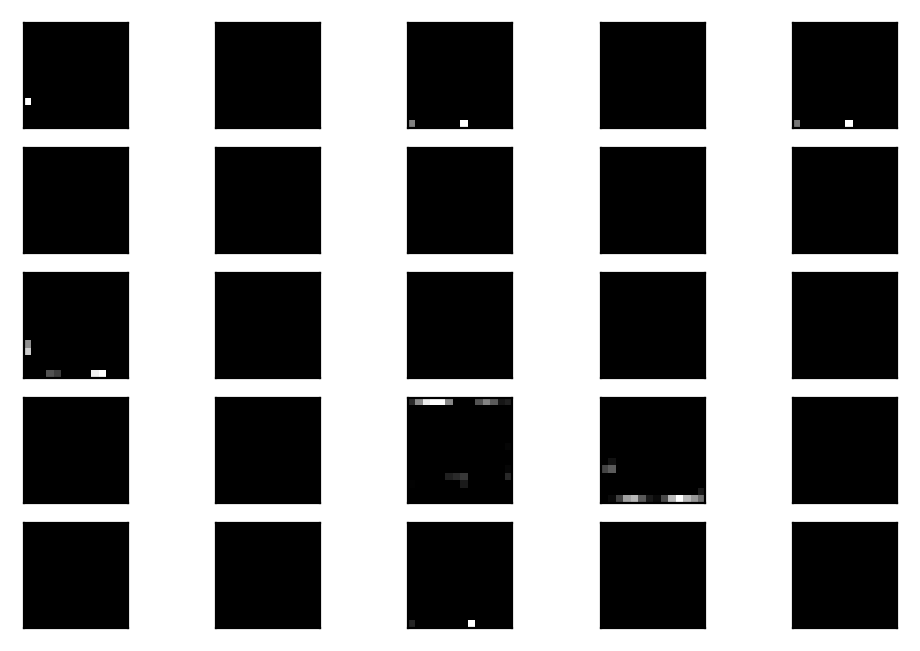

In [257]:
plt.rcParams['figure.dpi'] = 200
square = 5
ix = 1
for _ in range(square):
    for _ in range(square):
        ax= plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f_map[4][0,:,:,ix-1], cmap='gray')
        ix += 1
plt.show()